### Data Analysis Interview Challenge

#### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
login=pd.read_json('logins.json')

In [187]:
login.sort_values('login_time',inplace=True)

In [188]:
login.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [189]:
#check for null data
login.isna().sum()

login_time    0
dtype: int64

There is no missing data

In [190]:
# Set login_time as the index
login.set_index('login_time',inplace=True)

In [191]:
log_count=pd.DataFrame(login.resample('15T').size(),columns=['counts'])

In [192]:
log_count.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


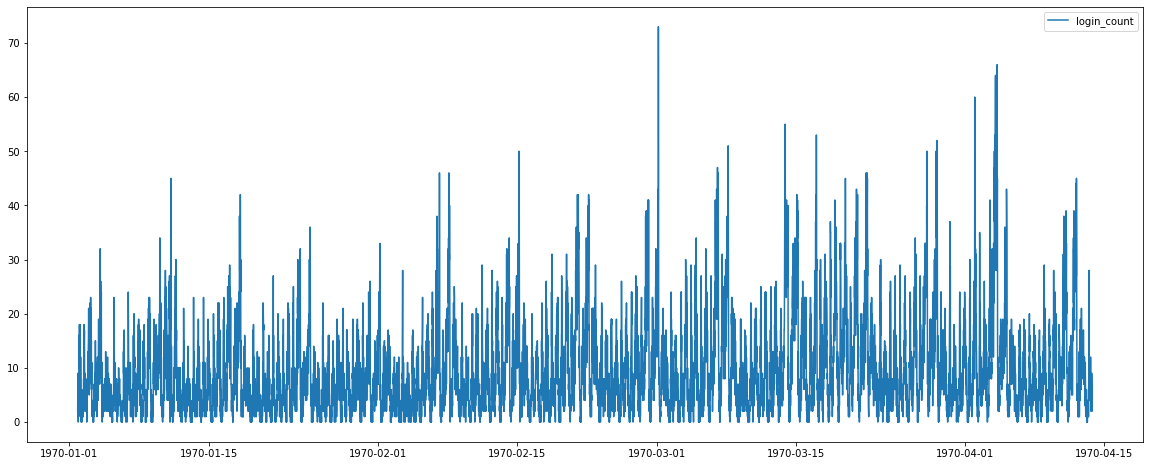

In [203]:
plt.figure(figsize=(20,8))
plt.plot(log_count,label='login_count')
plt.legend()
plt.show()

The data appears to exhibit a daily and monthly pattern, with an overall increase in the number of logins over time. We can use seasonal decomposition to show the seasonal pattern.

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

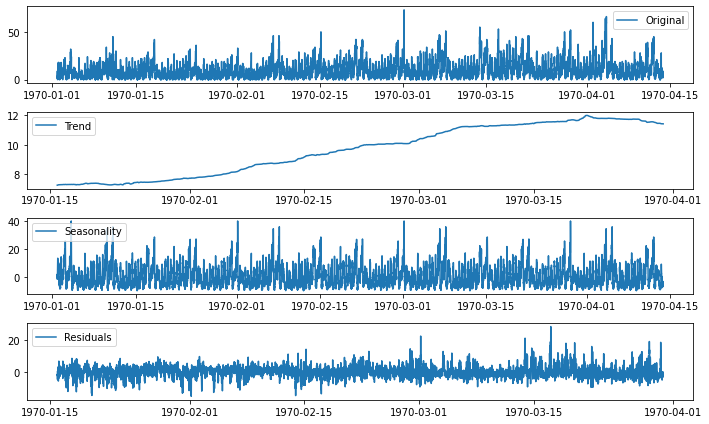

In [215]:
# Make a variable called decomposition with seasonal_decompose() 
#there are 4*24*7*4=2688 15min incremwnts in a month
decomposition = seasonal_decompose(log_count['counts'], period=2688)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

As expected, without the seasonality, we can observe an increase in the data.

Check the daily trend

In [220]:
login_d=pd.DataFrame(login.resample('D').size(),columns=['count_d'])
login_d.head()

,count_d
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


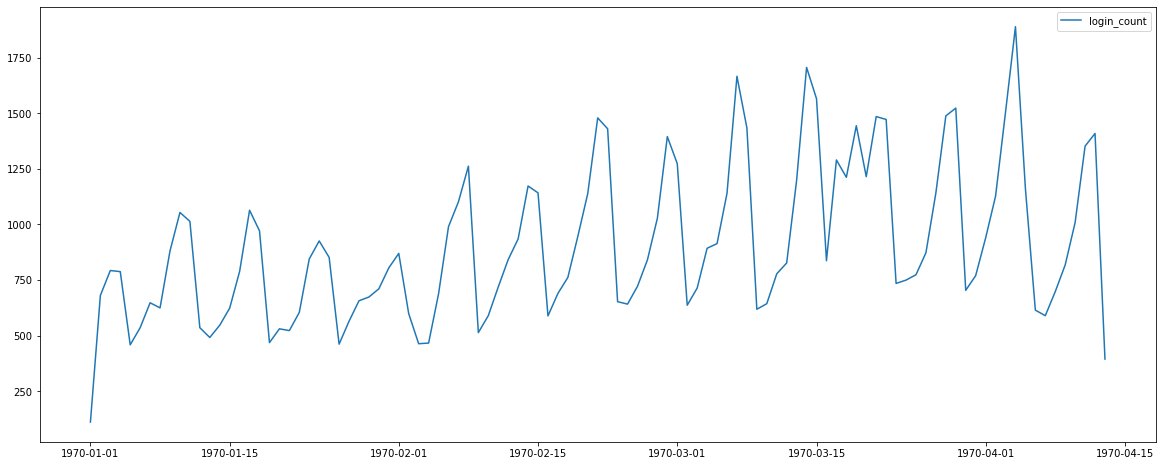

In [221]:
plt.figure(figsize=(20,8))
plt.plot(login_d,label='login_count')
plt.legend()
plt.show()

The daily trend shows cyclical behavior with intervals of days, like peaking on weekends and decreasing during weekdays.

#### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key measure of success for this experiment would be to focus on the frequency of driver partners crossing the toll bridge between Gotham and Metropolis. By tracking how often driver partners make trips between the two cities, the experiment's effectiveness in encouraging them to serve both locations can be evaluated. This metric directly reflects whether the toll reimbursement policy is achieving its goal of increasing driver partner availability in both cities instead of being restricted to just one. Monitoring the number of toll bridge crossings provides a clear and measurable indicator of the experiment's success in promoting cross-city service among driver partners.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

To implement the experiment, start by collecting historical data on toll bridge crossings by driver partners before implementing the toll reimbursement policy. Implement the toll reimbursement policy for a specific duration, such as one month, during which all toll costs for driver partners are reimbursed. Maintain a control group of driver partners who do not receive toll reimbursement during the same period. Continuously monitor and record the number of toll bridge crossings by driver partners during the policy implementation period for both experimental and control groups. Gather feedback from driver partners regarding their experience with the toll reimbursement policy and any challenges faced.

b) what statistical test(s) you will conduct to verify the significance of the observation

We can perform an independent samples t-test to compare the mean number of toll bridge crossings between the experimental group (reimbursed driver partners) and the control group (non-reimbursed driver partners) during the policy period. This test will help us ascertain if there is a statistically significant difference in toll bridge usage between the two groups. We'll set a significance level (alpha) at 0.05, indicating our willingness to accept a 5% chance of making a Type I error (false positive) when rejecting the null hypothesis.


c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

If the t-test results demonstrate a significant difference in toll bridge crossings between the experimental and control groups, we suggest that reimbursing toll costs has a meaningful impact on driver behavior. We can calculate effect sizes to quantify the magnitude of the differences observed. 

Recommendations: 
If the results are statistically significant and the effect size is substantial, we recommend continuing or expanding the toll reimbursement policy to encourage driver partners to serve both cities more frequently. Additionally, we can provide insights into the most effective reimbursement strategies based on subgroup analysis or qualitative feedback from driver partners. 

Caveats: We need to consider external factors that may influence toll bridge usage, such as weather conditions, special events, or changes in demand patterns unrelated to the reimbursement policy. It's also crucial to emphasize the importance of ongoing monitoring and evaluation to assess the long-term sustainability and effectiveness of the policy.

### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?


In [227]:
toll=pd.read_json('ultimate_data_challenge.json')

In [232]:
toll

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [230]:
toll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [233]:
toll.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [229]:
toll.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are missing values in the "avg_rating_of_driver," "phone," and "avg_rating_by_driver" columns of the dataset.
- For the "avg_rating_of_driver" and "avg_rating_by_driver" columns, we can fill the missing values with the mean rating of drivers.
- For the "phone" column, since it is a categorical variable, we can fill the missing values with the mode (most frequent value) of the phone types or 'none' which shows the user does not have any phone.

In [240]:
# Fill missing values in avg_rating_of_driver and avg_rating_by_driver with the mean
toll['avg_rating_of_driver'].fillna(toll['avg_rating_of_driver'].mean(), inplace=True)
toll['avg_rating_by_driver'].fillna(toll['avg_rating_by_driver'].mean(), inplace=True)

# Fill missing values in phone with 'none'
#mode_phone = toll['phone'].mode()[0]
toll['phone'].fillna('none', inplace=True)

# Check if missing values are filled
print(toll.isnull().sum())


city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


Convert the 'ultimate_black_user' column from boolean values (True/False) to binary values (0/1) 

In [275]:
toll['ultimate_black_user'] = toll['ultimate_black_user'].astype(int)
toll

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,0,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,0,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,1,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,0,100.0,4.58,3.5,0


#### Create a new feature for retention status
We define a driver as 'retained' if they were active in the preceding 30 days. To determine the date when the data was pulled, we can refer to the latest trip date in the dataset.

In [244]:
# Convert date columns to datetime format
toll['signup_date'] = pd.to_datetime(toll['signup_date'])
toll['last_trip_date'] = pd.to_datetime(toll['last_trip_date'])

# Create a new feature for retention status 
cutoff_date = toll['last_trip_date'].max() - pd.Timedelta(days=30)
toll['retained'] = (toll['last_trip_date'] >= cutoff_date).astype(int)

In [250]:
# Calculate the fraction of observed users who were retained
fraction_retained = toll['retained'].mean()
print(f'Fraction of observed users retained: {fraction_retained:.2f}')

Fraction of observed users retained: 0.38


The fraction of observed users retained is 38%, calculated based on the condition that a driver is considered retained if they were active in the preceding 30 days from the latest trip date in the dataset.

#### Correlation Matrix

Use correlation matrix to see the relationship between variables.

<AxesSubplot:>

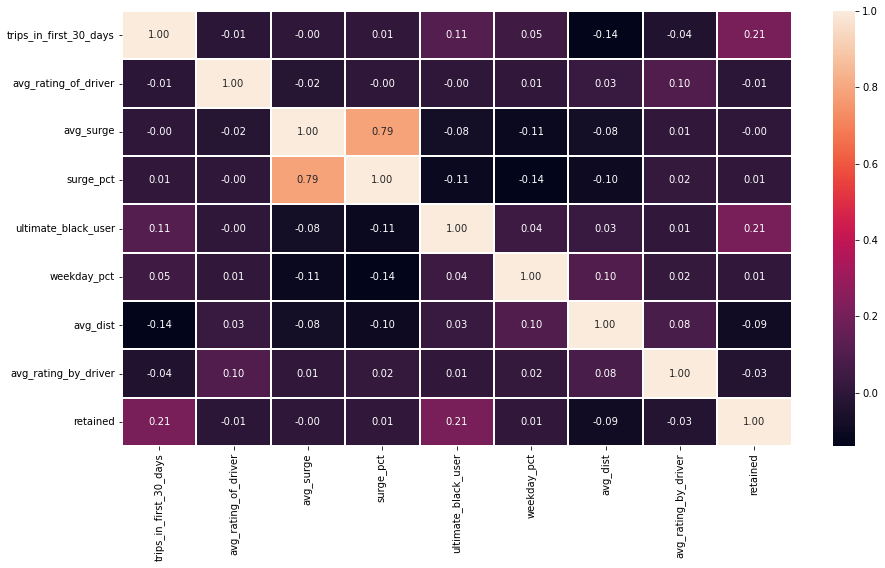

In [261]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(round(toll.select_dtypes('number').corr(),2), annot=True,fmt='.2f',linewidths=.05)

The correlation matrix indicates that the variables "ultimate_black_user" and "trips_in_first_30_days" exhibit the strongest correlations with the retained variable, suggesting that they are key predictors of driver retention.

##### Compare number of retained and non-retianed users for each feature

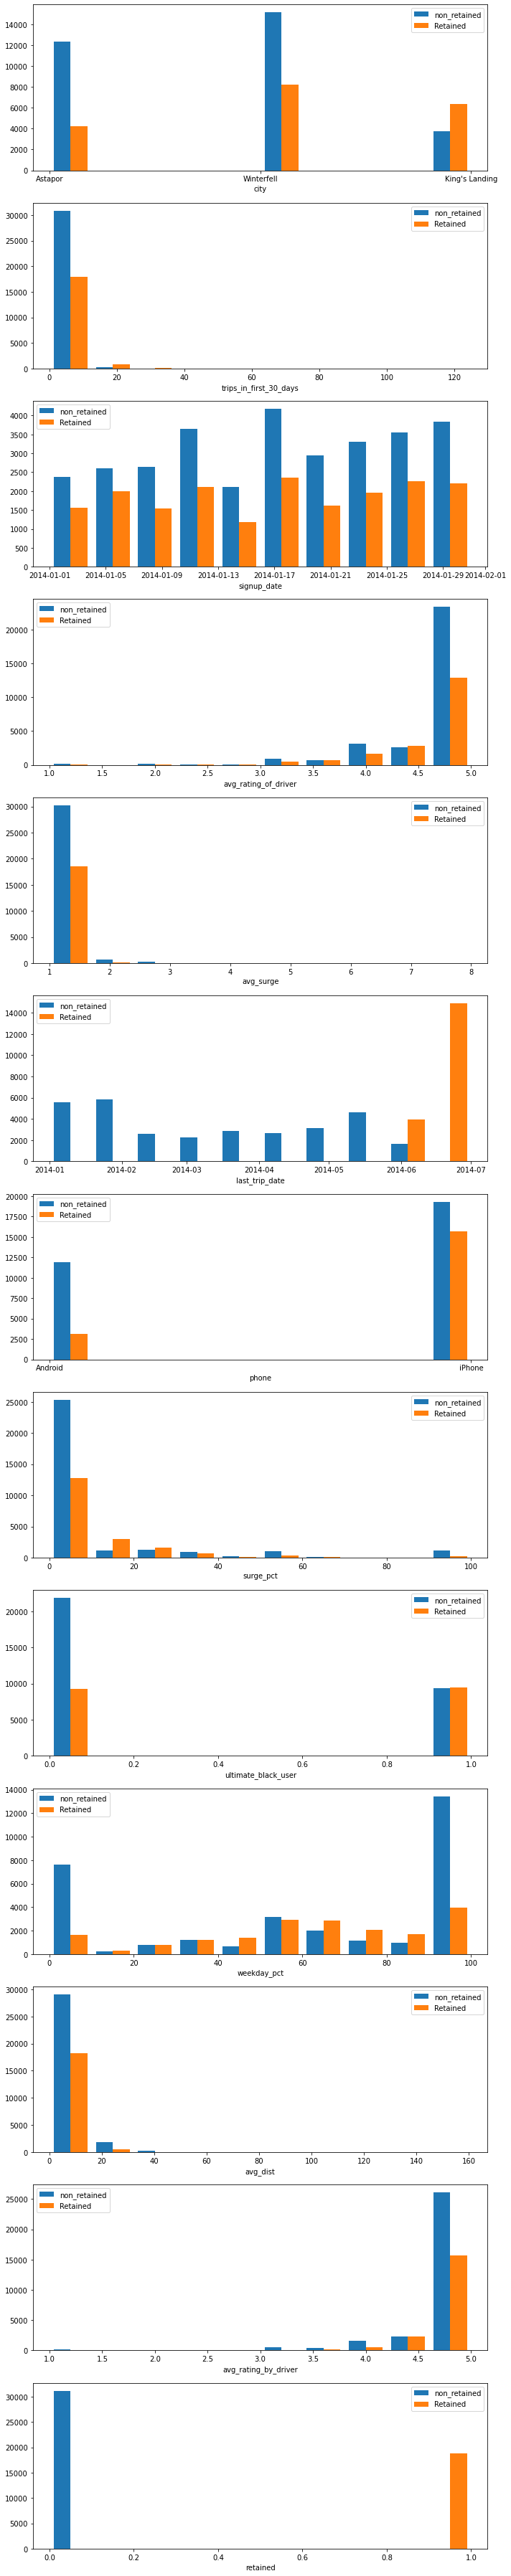

In [276]:
# Separate retained and non-retained users
non_retain = toll[toll.retained == 0]
retain = toll[toll.retained == 1]

# Create subplots
fig, axes = plt.subplots(len(toll.columns), figsize=(10, 50))

# Iterate over columns and create histograms
for ax, col in zip(axes, toll.columns): 
    ax.hist([non_retain[col], retain[col]], label=['non_retained', 'Retained'])
    ax.legend()
    ax.set_xlabel(col)
    
# Adjust layout for better visualization    
plt.tight_layout()  
plt.show()

City, phone , and ultimate black user exhibit significant differences in distributions between retained and non-retaines drivers, indicating their potential as strong predictors. 

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

First preprocess the data by encoding categorical variables.

In [279]:
toll.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [280]:
#selcting categorical fetures
cat_features=toll.select_dtypes('object').columns
cat_features

Index(['city', 'phone'], dtype='object')

In [294]:
# Creating dummy features
toll_c=pd.get_dummies(toll,columns=cat_features,drop_first=True,dtype=int, prefix='C')
toll_c.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,C_King's Landing,C_Winterfell,C_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,0


In [306]:
# Select features and target variable
X = toll_c.drop(columns=['retained','signup_date', 'last_trip_date'])
y=toll_c['retained']

#### Train/Test Split

Split the data into training and testing sets to evaluate the model's performance on unseen data.

In [296]:
from sklearn.model_selection import train_test_split

In [307]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We would consider using classification algorithms such as logistic regression, random forest, or gradient boosting.

#### Logistic Regression

We start with logistic regression as a baseline model due to its simplicity and interpretability.

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [308]:
# Build and train the logistic regression model
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [309]:
# Make predictions on the test set
y_pred = model_log.predict(X_test)

In [310]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

Accuracy: 0.72
Precision: 0.66
Recall: 0.50
F1 Score: 0.57
ROC-AUC Score: 0.67


Logistic regression model shows decent performance with:
- good accuracy (predicts the outcome about 72% of the time), 
- moderate precision (true positive predictions for about 66% of the time) and recall (correctly identifies about 50% of all actual positive cases),
- and a reasonable balance between them as indicated by the F1 score (0.57).
- The ROC-AUC score also indicates that the model has some discriminatory power in distinguishing between the classes (0.67).
- However, it's essential to consider the specific context and requirements of the problem domain when interpreting these metrics.

#### Random Forst Model

Next, we can use Random forest to see if we can improve the model performance

Random Forest is a powerful ensemble methods that can capture complex relationships in the data and handle non-linearity.

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [313]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [314]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.75
Precision: 0.68
Recall: 0.66
F1 Score: 0.67
ROC-AUC Score: 0.73


Random forest model demonstrates a reasonable level of accuracy, precision, recall, and F1 score, indicating that it can make reliable predictions. The ROC-AUC score further confirms the model's ability to differentiate between positive and negative instances. 
Overall, the Random Forest model performs better than the Logistic Regression model across all metrics, demonstrating its superiority in terms of predictive power and generalization ability for the given task.
However, further analysis and potentially model improvements may be necessary. We can perform hyperparameter tuning to optimize the Random Forest model's performance. 

#### Tune Hyperparameters

In [316]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

#### The Best Model

In [331]:
# Make predictions using the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the evaluation metrics for the best model
print("Best Tunned Random forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"ROC-AUC Score: {roc_auc_best:.2f}")

Best Tunned Random forest Model Evaluation Metrics:
Accuracy: 0.79
Precision: 0.75
Recall: 0.66
F1 Score: 0.70
ROC-AUC Score: 0.76


The tuned Random Forest model showed improvements in most evaluation metrics compared to the original Random Forest model. However, the lack of improvement in recall suggests that exploring XGBoost might yield further enhancements in capturing all active users.

### XGBoost Model

In [319]:
from xgboost import XGBClassifier

In [320]:
#Initialize and Train the XGBoost Model
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [322]:
#Make Predictions
y_pred = model_xg.predict(X_test)

In [323]:
#Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [330]:
#Print Evaluation Metrics
print("Best XGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Best XGBoost Model Evaluation Metrics:
Accuracy: 0.79
Precision: 0.74
Recall: 0.67
F1 Score: 0.70
ROC-AUC Score: 0.76


It seems using XGBoost has led to improvements in model performance compared to Random Forest. The recall, F1 score, and ROC-AUC score are all higher for the XGBoost model, indicating that it is better at correctly classifying positive cases (retained users) and distinguishing between true positives and false positives.

#### Tune Hyperparameters

In [333]:
#Define Parameter Grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [335]:
# Initialize GridSearchCV
xgb = XGBClassifier()
grid_search_xg = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Perform Grid Search to find the best hyperparameters
grid_search_xg.fit(X_train, y_train)

# Get the best estimator parameters
print("Best Parameters:", grid_search_xg.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


#### The Best Model

In [336]:
#Get the best estimator
best_model_xg = grid_search_xg.best_estimator_

# Make predictions using the best model
y_pred_best = best_model_xg.predict(X_test)

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the evaluation metrics for the best model
print("Best Tunned XGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"ROC-AUC Score: {roc_auc_best:.2f}")

Best Tunned XGBoost Model Evaluation Metrics:
Accuracy: 0.79
Precision: 0.74
Recall: 0.68
F1 Score: 0.71
ROC-AUC Score: 0.77


The tuned XGBoost model has shown improvement across all evaluation metrics compared to the untuned version. The higher recall, F1 score, and ROC-AUC score indicate that the model's overall performance has been enhanced after hyperparameter tuning.

### Model Selection

The results from the tuned XGBoost model showcase improvements across multiple key evaluation metrics, with the recall, F1 score, and ROC-AUC score exhibiting the most substantial gains. These improvements indicate that the tuned XGBoost model has a higher capability of correctly identifying positive cases (retained users) while maintaining a good balance between precision and recall. The higher ROC-AUC score further validates the model's ability to discriminate between positive and negative cases effectively. Based on these results, we select the tuned XGBoost model as the preferred choice because it demonstrates the best overall performance across various evaluation metrics, highlighting its efficacy in predicting user retention accurately.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Ultimate can leverage the insights gained from the model to improve long-term rider retention by implementing targeted strategies. For instance, the model can identify factors that significantly impact rider retention, such as city, phone type, and ultimate black user status. Ultimate can then focus on optimizing services and incentives for users in key cities, tailor promotions based on phone type preferences, and devise retention programs for ultimate black users. By addressing these critical factors, Ultimate can enhance user experience, ultimately leading to improved long-term rider retention.